<a href="https://colab.research.google.com/github/Jinyong-20/Machine_Learning_Programming/blob/master/lesson4_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.collab import *
from fastai.tabular import *
from fastai import *

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Collaborative filtering example

`collab` models use data in a `DataFrame` of user, items, and ratings.

In [ ]:
user,item,title = 'userId','movieId','title'

In [5]:
path = untar_data(URLs.ML_SAMPLE)
path

PosixPath('/root/.fastai/data/movie_lens_sample')

In [6]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


\# movie lens홈페이지에서 데이터를 받아와 데이터 프레임 생성

That's all we need to create and train a model:

In [ ]:
data = CollabDataBunch.from_df(ratings, seed=42)

\# 콜랍데이터번치를 생성

In [ ]:
y_range = [0,5.5]

In [ ]:
learn = collab_learner(data, n_factors=50, y_range=y_range)

In [12]:
doc(collab_learner)

In [11]:
learn

CollabLearner(data=TabularDataBunch;

Train: LabelList (4825 items)
x: CollabList
userId 73; movieId 1097; ,userId 561; movieId 924; ,userId 157; movieId 260; ,userId 358; movieId 1210; ,userId 130; movieId 316; 
y: FloatList
4.0,3.5,3.5,5.0,2.0
Path: .;

Valid: LabelList (1206 items)
x: CollabList
userId 306; movieId 2628; ,userId 605; movieId 3793; ,userId 313; movieId 4886; ,userId 468; movieId 1136; ,userId 380; movieId 539; 
y: FloatList
3.0,2.0,4.5,4.0,1.5
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(101, 50)
  (i_weight): Embedding(101, 50)
  (u_bias): Embedding(101, 1)
  (i_bias): Embedding(101, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPath('.'), model_dir='models', callback_fns=[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False)], callbacks=[], layer_groups=[Sequent

\# 콜랍러너를 가져오기
y_range : 평점의 범위

한번에 50개

In [10]:
learn.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.640420,0.969819,00:01
1,0.847478,0.672590,00:00
2,0.650898,0.663043,00:00


\# 3회 학습

## Movielens 100k

Let's try with the full Movielens 100k data dataset, available from http://files.grouplens.org/datasets/movielens/ml-100k.zip

In [65]:
path=Config.data_path()/'ml-100k'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/ml-100k')

In [ ]:
! cp '/content/u.data' '/root/.fastai/data/ml-100k'
! cp '/content/u.item' '/root/.fastai/data/ml-100k'

In [ ]:
! rm -r '/root/.fastai/data/ml-100k'

In [70]:
! ls '/root/.fastai/data/ml-100k'

u.data	u.item


In [71]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


\# 직접 u.data랑 u.item을 업로드해서 목적 폴더에 옮김.
폴더 직접 생성, 기존 폴더 삭제후 패런트 상속해서 생성하였음.
이후 파일 복사해서 이동
이동한 데이터로 데이터 프레임 생성

In [72]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


\# 이번에는 u.item 데이터로 데이터 프레임 생성

In [73]:
len(ratings)

100000

\# 총 개수

In [74]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


\# 두 데이터 프레임을 결합하면서 타이틀을 추가

In [ ]:
data = CollabDataBunch.from_df(rating_movie, seed=42, valid_pct=0.1, item_name=title)

\# 생성한 데이터 프레임에서 데이터번치생성 

In [80]:
data.show_batch()

userId,title,target
903,Blade Runner (1982),4.0
779,Star Wars (1977),5.0
100,Tomorrow Never Dies (1997),4.0
473,Chungking Express (1994),4.0
916,Kalifornia (1993),4.0


In [ ]:
y_range = [0,5.5]

In [ ]:
learn = collab_learner(data, n_factors=40, y_range=y_range, wd=1e-1)

\# 콜랍 러너 가져오기
Q. n_factors의 값이 무엇인지 잘 모르겠습니다.  bs와 마찬가지인건가요?

*n_factors = embedding bias의 latent factors*

*bs = batch size*

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


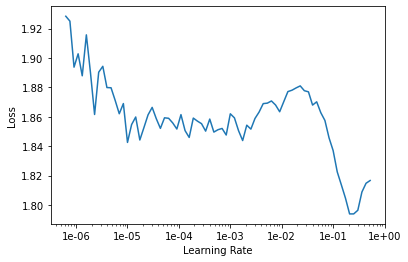

In [83]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [84]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.940870,0.947486,00:09
1,0.850474,0.874748,00:08
2,0.757157,0.835195,00:09
3,0.642747,0.814981,00:08
4,0.560360,0.816110,00:09


\# 최적 학습률 찾아서 학습 5번 수행

In [ ]:
learn.save('dotprod')

\# 결과 저장

Here's [some benchmarks](https://www.librec.net/release/v1.3/example.html) on the same dataset for the popular Librec system for collaborative filtering. They show best results based on RMSE of 0.91, which corresponds to an MSE of `0.91**2 = 0.83`.

## Interpretation

\# 이후 내용은 강의 영상에서 다루지 않아서 일단 스스로 해석한 내용으로 진행하였습니다

### Setup

In [ ]:
learn.load('dotprod');

\# 결과 불러오기

In [87]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

\# 러너 출력
행렬들의 크기, 추가된 값을 출력

In [88]:
g = rating_movie.groupby(title)['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

\# 영화들을 별점에 따라서 정렬하고, 높은 순위만 뽑아냄

### Movie bias

In [89]:
movie_bias = learn.bias(top_movies, is_item=True)
movie_bias.shape

torch.Size([1000])

In [96]:
help(movie_bias.shape)

Help on Size object:

class Size(builtins.tuple)
 |  tuple() -> empty tuple
 |  tuple(iterable) -> tuple initialized from iterable's items
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Method resolution order:
 |      Size
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __mul__(self, value, /)
 |      Return self*value.
 |  
 |  __new__(*args, **kwargs) from builtins.type
 |      Create and return a new object.  See help(type) for accurate signature.
 |  
 |  __reduce__(...)
 |      helper for pickle
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  __rmul__(self, value, /)
 |      Return value*self.
 |  
 |  numel(...)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from builtins.tuple:
 |  
 |  __contains__(self, key, /)
 | 

\# 기존 모델에서 bias들을 불러옴(그래디언트 연산에 추가로 더하는 값) - 여기선 영화 선호도나 영화의 유명함 정도

shape로 사이즈 반환

In [ ]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_movies,movie_bias)]

\# 평균 평점 생성

\# 평균 평점을 토대로 영화 랭킹 생성

In [ ]:
item0 = lambda o:o[0]

\# 0으로 채운 행렬 생성?
- 잘모르겠습니다

*item0는 movie_ratings 리스트에 함수. movie_ratings 리스트 읽을때 0부터 읽는 것임. sorted 함수에 Reverse=True 되면, 제일 높은 ratings 부터 함*

In [92]:
sorted(movie_ratings, key=item0)[:15]

[(tensor(-0.3752),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.3301),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2794), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2632), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2626), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2588), 'Barb Wire (1996)', 1.9333333333333333),
 (tensor(-0.2537), 'Beautician and the Beast, The (1997)', 2.313953488372093),
 (tensor(-0.2494), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.2489), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2323), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2247), "Joe's Apartment (1996)", 2.2444444444444445),
 (tensor(-0.2236), "McHale's Navy (1997)", 2.1884057971014492),
 (tensor(-0.2222), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.2221), 'Ready to Wear (Pret-A-Porter) (1994)', 1.833

\# 정렬된 영화 랭킹을 15까지 출력(높은순)

In [93]:
sorted(movie_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.6167), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5687), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5627), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5456), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.5423), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5355), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5300), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5255), 'As Good As It Gets (1997)', 4.196428571428571),
 (tensor(0.5208), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.5170), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5035), 'Apt Pupil (1998)', 4.1),
 (tensor(0.4748), 'Vertigo (1958)', 4.251396648044692),
 (tensor(0.4660), 'Boot, Das (1981)', 4.203980099502488),
 (tensor(0.4654), 'Close Shave, A (1995)', 4.491071428571429),
 (tensor(0.4521), 'Godfather, The (1972)', 4.283292978208232)]

\# 정렬된 영화 랭킹을 15까지 출력(낮은순)

### Movie weights

In [97]:
movie_w = learn.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

\# 러너에서 weight불러오기

사이즈 출력

In [106]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

\# movie_w에서 pca를 3열까지만 불러오기

사이즈 출력(40 -> 3으로 줄어들었음)
  - pca는 무엇을 의미하는지 모르겠습니다

*pca = principal component analysis. 시각화를 위해 3차원으로 차원 감소.*

In [108]:
movie_pca.t()

tensor([[-0.6859, -0.0271, -0.9046,  ...,  0.3337,  0.7763,  0.5262],
        [ 0.7224,  0.3303, -0.2122,  ..., -0.3458, -0.2763,  0.1309],
        [-0.6777, -0.1601, -0.0944,  ..., -0.0522,  0.2197,  0.0556]])

In [ ]:
fac0,fac1,fac2 = movie_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_movies)]

\# 받아온 행렬의 열 3개를 fac0, fac1, fac2로, 받고 tensor와 영화 제목을 매칭시켜 movie_comp 생성

In [100]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3269), 'Home Alone 3 (1997)'),
 (tensor(1.1957), 'Jungle2Jungle (1997)'),
 (tensor(1.1684), "McHale's Navy (1997)"),
 (tensor(1.1622), 'Leave It to Beaver (1997)'),
 (tensor(1.1422), 'Bio-Dome (1996)'),
 (tensor(1.1278), 'Children of the Corn: The Gathering (1996)'),
 (tensor(1.1111), 'Congo (1995)'),
 (tensor(1.1037), 'Mortal Kombat: Annihilation (1997)'),
 (tensor(1.0913), 'D3: The Mighty Ducks (1996)'),
 (tensor(1.0552), 'Grease 2 (1982)')]

In [101]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.1182), 'Casablanca (1942)'),
 (tensor(-1.0843), 'Close Shave, A (1995)'),
 (tensor(-1.0678), 'Lawrence of Arabia (1962)'),
 (tensor(-1.0461), 'When We Were Kings (1996)'),
 (tensor(-1.0402), 'Chinatown (1974)'),
 (tensor(-1.0145), 'Wrong Trousers, The (1993)'),
 (tensor(-1.0132), 'Godfather, The (1972)'),
 (tensor(-1.0116), 'North by Northwest (1959)'),
 (tensor(-0.9889),
  'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)'),
 (tensor(-0.9750), 'Apocalypse Now (1979)')]

\# 각각 movie_comp의 순서대로정렬/역방향정렬하여 10개 출력

tensor값이 별점인 것을 알 수 있음

In [ ]:
movie_comp = [(f, i) for f,i in zip(fac1, top_movies)]

In [103]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.1413), 'Braveheart (1995)'),
 (tensor(1.0752), 'Titanic (1997)'),
 (tensor(1.0437), 'Raiders of the Lost Ark (1981)'),
 (tensor(0.9220), "It's a Wonderful Life (1946)"),
 (tensor(0.9136), 'Forrest Gump (1994)'),
 (tensor(0.8611), 'Independence Day (ID4) (1996)'),
 (tensor(0.8365), 'American President, The (1995)'),
 (tensor(0.8203), 'Pretty Woman (1990)'),
 (tensor(0.8166), 'Hunt for Red October, The (1990)'),
 (tensor(0.8160), 'Air Force One (1997)')]

In [104]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-0.8603), 'Trainspotting (1996)'),
 (tensor(-0.8484), 'Keys to Tulsa (1997)'),
 (tensor(-0.8320), 'Ready to Wear (Pret-A-Porter) (1994)'),
 (tensor(-0.8271), 'Dead Man (1995)'),
 (tensor(-0.7972), 'Lost Highway (1997)'),
 (tensor(-0.7931), 'Nosferatu (Nosferatu, eine Symphonie des Grauens) (1922)'),
 (tensor(-0.7381), 'Clockwork Orange, A (1971)'),
 (tensor(-0.7359), 'Cable Guy, The (1996)'),
 (tensor(-0.7029), 'Stupids, The (1996)'),
 (tensor(-0.7011), 'Jude (1996)')]

\# 이번에는 fac1에 대하여 위의 과정을 동일하게 수행

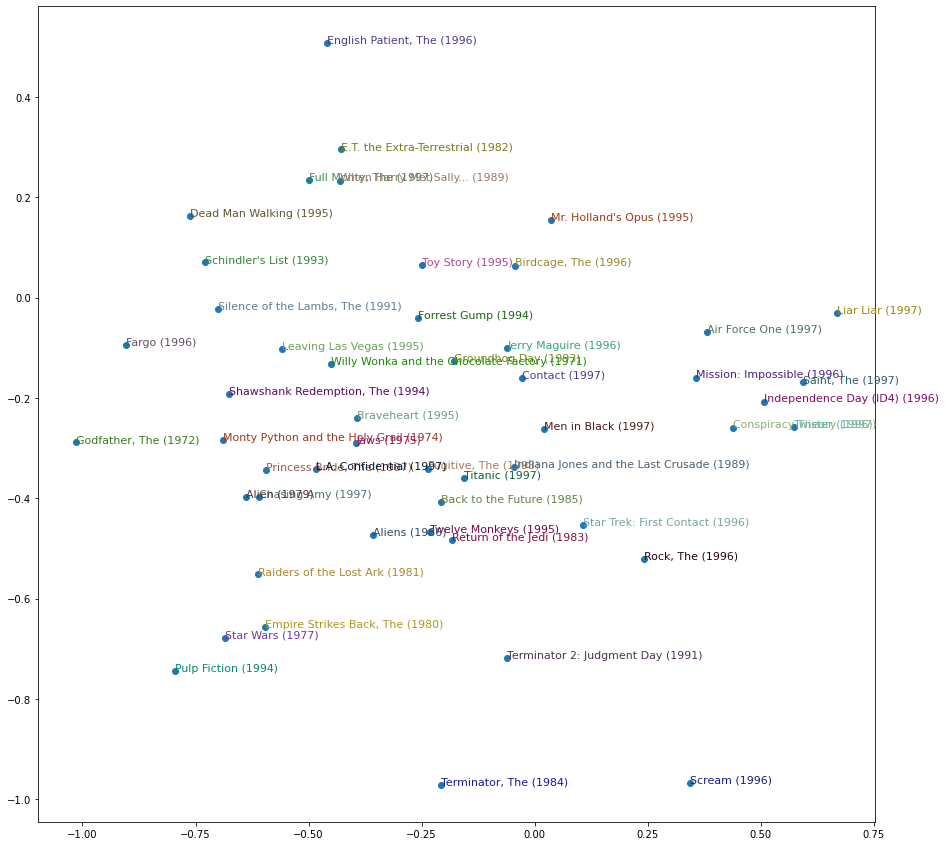

In [105]:
idxs = np.random.choice(len(top_movies), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

\# 랜덤으로 50개의 탑 영화들을 뽑아서, fac0 와 fac2의 값에 따라 분포시켜 출력

\# 위의weight행렬에서 fac0, fac1, fac2가 어떤 항목인지 잘 모르겠습니다

*lesson 5에 fac0, fac1, fac2 설명 더 있으니 수업 영상을 보고 아직 이해가 안 가면 말씀해 주세요 ~*